# 1. Introduction  ( Brief overview of the project, its goals, and the data used.)

### This dataset was generated in 2019 by one of our group members and was aimed to create a Book Recommendation system. We used it as a raw material for cleaning up, leading it to a unified appearance, while we had words written in Armenian, Latin Armenian, some English words and Russian ones, and most of them contained mistakes or general typos. We grouped them and cleared the dataset to have Armenian words written only in Armenian, and other words translated to Armenian by using the implemented translators. We also used the probability of the correct spelling due to some language-related peculiarities such as sounds not existing in any other language except Armenian

# 2. Data ( Description of the data used, including its source, structure, and any relevant features.)

### The information was based on 1000 individuals' responses to 52 questions. The key questions concerned the authors and books that the respondents had read, were reading, or intended to read. It was challenging to assess the data because the responses were disorganized and occasionally misspelled. 

### Firstly, all the responses were stripped of any symbol, leaving simply pure text. The Armenian words from the Latin keyboard were then converted to the Armenian keyboard. Since many authors' and books' names were misspelled, our code employed Google's search engine to replace any inaccurate searches with the proper versions of them. In the end, we had pure data which didn't contain any kind of mistakes. It was easy to group and sort the answers and visualize the numbers.

# 3. Experiments ( Description of the experiments performed on the data, including data cleaning,exploration, visualization, and modeling. This section should include code snippets and visual-izations that support the findings)

### We have done experiments on our data, such as cleaning, exploration, visualization, and modeling. 

### 1)Cleaning The data was cleaned by eliminating unnecessary words, characters, and symbols. Moreover, we converted the information into Armenian from Russian and English. 

### 2)Exploration Through this process, we discovered patterns and relationships within the dataset. 

### 3)Visualization and Modeling To make the data visually appealing and understandable, we employed various visualizations using charts.

# 4. Conclusion ( Summary of the findings of the analysis, including any insights gained, limitations,and recommendations for future work)

   ### 1. It is important to have a good clean data for the model creation, so precious note to take from this project is that categorical variables are good and unless you specify exactly how user should input words, do not ever leave the with blank input option for the users

   ### 2. From the collected insights we can see that there is no diversity of data in terms of gender, which can lead to a biased model, also the dataset has a limitation of only 1000 users which is not enough for creating a good model. 

   ### 3. For the future, since we already have a small data, the data should be cleaned even better in order to have exact values of authors and books and not leave anything behind. 

# Book Recommender System 
# by Anzhelika Simonyan, Armen Mkrtumyan, Diana Tumasyan, Anzhela Davityan

# Data Preproecessing

## Including necessary libraries and sources

##### Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests #For loading the dictionary of English words

import random

import re

from googletrans import Translator #Translating Armenian words to Russian/English

#Web scraping
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException, ElementNotInteractableException, WebDriverException

##### These 2 sources will be used for english text detection later on 

In [40]:
dictionary = set(requests.get("https://raw.githubusercontent.com/dwyl/english-words/master/words_dictionary.json").json().keys())
english_authors = pd.read_csv('final_dataset.csv')['name']
english_authors = english_authors.apply(lambda author: author.lower())

#### Settings for scraping

In [41]:
#In order to leave the webbrowser open even after finishing the code
options = Options() 
options.add_argument('--headless=new') #TURN THIS ON/OFF
options.add_experimental_option("detach", True)
#__________

## General idea about the dataset

In [42]:
data = pd.read_csv('Raw_Dataset - Sheet1.csv')
data = data.replace("Դետեկտիվ.", "Դետեկտիվ")

In [43]:
data

,Սեռ,Բնակության վայրը,Քաղաք/Գյուղ,Տարիք,Արկածային,Բանաստեղծություններ,Դասական,Կոմիքս,Դետեկտիվ.,Դրամա,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
0,Աղջիկ,Երևան,Երևան,12-14,Արկածային,NaN,Դասական,Կոմիքս,Դետեկտիվ,Դրամա,...,Հերման Հեսսե,Վարդկես Պետրոսյան,Վիլյամ Սարոյան,Այդ Ալյեն,NaN,NaN,NaN,NaN,NaN,NaN
1,Աղջիկ,Երևան,NaN,23+,Արկածային,NaN,Դասական,NaN,Դետեկտիվ,NaN,...,Томас Гарди,Драйзер,Франк Тилье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Աղջիկ,Տավուշ,Նոյեմբերյան,15-18,Արկածային,NaN,Դասական,NaN,NaN,Դրամա,...,Վարդգես Պետրոսյան,Հրաչյա Մանուկյան,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Աղջիկ,Երևան,NaN,15-18,NaN,NaN,NaN,NaN,NaN,NaN,...,Մուրացան,Շիրվանզադե,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Աղջիկ,Լոռի,Ստեփանավան,12-14,Արկածային,NaN,NaN,NaN,Դետեկտիվ,Դրամա,...,Գուրգեն Մահարի,Նար֊Դոս,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Աղջիկ,Սյունիք,NaN,15-18,Արկածային,NaN,NaN,NaN,Դետեկտիվ,Դրամա,...,Դյումա,Հեսսե,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Աղջիկ,Սյունիք,Սիսիան,15-18,Արկածային,NaN,NaN,NaN,NaN,Դրամա,...,Վարդգես Պետրոսյան,Ժորժ Սանդ,Շիրվանզադե,Վահան Տերյան,Պաուլո Կուելիո,NaN,NaN,NaN,NaN,NaN
997,Աղջիկ,Սյունիք,NaN,15-18,NaN,NaN,Դասական,NaN,Դետեկտիվ,Դրամա,...,Չունեմ սիրած հեղինակներ որպես այդպիսին,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Աղջիկ,Սյունիք,NaN,12-14,NaN,NaN,NaN,NaN,NaN,Դրամա,...,Hovhannes Tumanyan,Nar_dos,Avetiq Isahakyan,Hamo Sahyan,Daniel Varujan,NaN,NaN,NaN,NaN,NaN


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Սեռ                  1000 non-null   object
 1   Բնակության վայրը     1000 non-null   object
 2   Քաղաք/Գյուղ          452 non-null    object
 3   Տարիք                1000 non-null   object
 4   Արկածային            457 non-null    object
 5   Բանաստեղծություններ  160 non-null    object
 6   Դասական              284 non-null    object
 7   Կոմիքս               59 non-null     object
 8   Դետեկտիվ.            364 non-null    object
 9   Դրամա                546 non-null    object
 10  Առակ                 37 non-null     object
 11  Հեքիաթ               71 non-null     object
 12  Ֆանտաստիկա           334 non-null    object
 13  Սարսափ               112 non-null    object
 14  Լեգենդ               115 non-null    object
 15  Ռոմանս               421 non-null    object
 16  Կենսագր

# Data cleaning

In [45]:
data.loc[[1,998, 100, 651, 638, 101, 104, 106,732, 122], "Հեղինակ 1":"Հեղինակ 10"]

,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
1,Томас Гарди,Драйзер,Франк Тилье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Hovhannes Tumanyan,Nar_dos,Avetiq Isahakyan,Hamo Sahyan,Daniel Varujan,NaN,NaN,NaN,NaN,NaN
100,Ագաթա Քրիստի,Արթուր Կոնան Դոյլ,Ալեքսանդր Դյումա,Պարույր Սևակ ։),Օ'Հենրի,Մարկ Տվեյն,Շեքսպիր,Շառլոթ Բրոնտե,Վահան Տերյան,Շիրվանզադե
651,Джон Грин,Տա Թևեր,Джоджо Мойес,Շիրվանզադե,Շեքսպիր,NaN,NaN,NaN,NaN,NaN
638,Բալզակ <>,Ջեյ Օսթին <>,Ջոն Գրին <>,Հենրի Հագարդ<>,Սթիվ Ջոբս,NaN,NaN,NaN,NaN,NaN
101,Jane Austin,J. K. Rowling,Charlotte Bronte,Louisa May Alcott,John Green,Oscar Wilde,NaN,NaN,NaN,NaN
104,Ջոն Գրին,Գ.Գ Մարկես,Կլոդ Սիմոն,Պաուլու Կոելյու,Ժան-Քրիստոֆ-Ռյուֆեն,NaN,NaN,NaN,NaN,NaN
106,Դժվարանում եմ առանձնացնել,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,«Ինձ պիոններ չնվիրես »😍,«Հավերժ քոնը»❤️,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Բալզակ,Մուրացան,Նար-Դոս,Թումանյան,Կաֆկա,Էլիֆ Շաֆակ,"Համո Սահյան, Վահան Տերյան",Մոպասան,Ռեմարկ,Ջեյն Օստեն


### As we can see 
### Latinatar hayeren, Դժվարանում եմ առանձնացնել, Պարույր Սևակ :), multiple languages,  or multiple authors on the same cell are inacceptable and should be removed

In [46]:
def remove_symbols(sentence):
    '''
    Cleans all the unnecesary symbols in the dataset 
    (empty spaces, special symbols, unnecessary numbers)
    '''
    
    if(sentence is np.nan):
        return (np.nan)
    sentence = str(sentence)
    new_sentence = ""
    for symbol in sentence:
        if symbol.isalpha() or symbol.isnumeric() or symbol == " ":
            new_sentence += symbol
        else:
            new_sentence += " "
    string = ""
    for i in new_sentence.split():
        string += i + " "
    string = string.strip()
    return (string)

### Get the books and authors and remove unnecessary symbols and make everything lowercase for easier processing

In [47]:
books_authors = data.loc[:, "Գիրք 1" :]
books_authors.columns

Index(['Գիրք 1', 'Գիրք 2', 'Գիրք 3', 'Գիրք 4', 'Գիրք 5', 'Գիրք 6', 'Գիրք 7',
       'Գիրք 8', 'Գիրք 9', 'Գիրք 10', '_Գիրք 1_', '_Գիրք 2_', '_Գիրք 3_',
       '_Գիրք 4_', '_Գիրք 5_', '_Գիրք 6_', '_Գիրք 7_', '_Գիրք 8_', '_Գիրք 9_',
       '_Գիրք 10_', 'Հեղինակ 1', 'Հեղինակ 2', 'Հեղինակ 3', 'Հեղինակ 4',
       'Հեղինակ 5', 'Հեղինակ 6', 'Հեղինակ 7', 'Հեղինակ 8', 'Հեղինակ 9',
       'Հեղինակ 10'],
      dtype='object')

In [48]:
books_authors = books_authors.applymap(remove_symbols)
books_authors = books_authors.applymap(lambda string: string if string is np.nan else string.lower())

### As we can see all the unnecessary symbols are removed, for now it does not matter that some names are still in other languages or that first and last names are connected, because the upcoming functions will fix that for us

In [49]:
books_authors.head()

,Գիրք 1,Գիրք 2,Գիրք 3,Գիրք 4,Գիրք 5,Գիրք 6,Գիրք 7,Գիրք 8,Գիրք 9,Գիրք 10,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
0,վ սարոյան,ս աղաջանյան,կ լաֆորետ,ա ալյեն,մ արեն,ա շիրվանզադե,լերմոնտով,ա դյումա,հ հեսսե,գ գ մարկես 100 տարվա մենություն,...,հերման հեսսե,վարդկես պետրոսյան,վիլյամ սարոյան,այդ ալյեն,NaN,NaN,NaN,NaN,NaN,NaN
1,один день,тесс из рода д эрбервиллей,жажда жизни,убик,пандемия,завтра,NaN,NaN,NaN,NaN,...,томас гарди,драйзер,франк тилье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,սերը ժանտախտի օրերին,NaN,NaN,ապրած և չապրած տարիներ,NaN,NaN,NaN,NaN,NaN,NaN,...,վարդգես պետրոսյան,հրաչյա մանուկյան,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,հայրենասեր օրիորդը,աստղերն են մեղավոր,քաոս,պատվի համար,731 օր քեզ համար,NaN,NaN,NaN,NaN,NaN,...,մուրացան,շիրվանզադե,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ես և նա,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,գուրգեն մահարի,նար դոս,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### This function creates a dictionary of Armenian letters and their latin "counterparts" and uses probability to convert Armenian text to Latin Armenian text, because for some letters such as "և" we have options "yev" and "ev"

In [50]:
def random_choice(key, probability_of_val1):
    '''Chooses a random number between 0 and 1 and compares it to the received probability'''
    return key if random.random() < probability_of_val1 else 0

#Dictionary is referenced from YerevaNN
wordDict = {
    "ց": {"c": 0.8, "ts": 0.2},
    "ր": {"r": 1},
    "փ": {"p": 1},
    "օ": {"o": 1},
    "ք": {"q": 0.7, "k": 0.3},
    "և": {"ev": 0.7, "yev": 0.3},
    "ֆ": {"f": 1},
    "ՈՒ": {"U": 1},
    "Ու": {"U": 1},
    "ու": {"u": 1},
    "Ա": {"A": 1},
    "Գ": {"G": 1},
    "Բ": {"B": 1},
    "Ե": {"Ye": 0.1, "YE": 0.1, "E": 0.8},
    "Դ": {"D": 1},
    "Է": {"E": 1},
    "Զ": {"Z": 1},
    "Թ": {"T": 0.9, "Th": 0.05, "TH": 0.05},
    "Ը": {"Y": 0.35, "@": 0.45, "E": 0.2},
    "Ի": {"I": 1},
    "Ժ": {"ZH": 0.15, "J": 0.5, "Zh": 0.15, "G": 0.2},
    "Խ": {"Gh": 0.05, "X": 0.7, "Kh": 0.1, "KH": 0.1, "GH": 0.05},
    "Լ": {"L": 1},
    "Կ": {"K": 1},
    "Ծ": {"C": 0.3, "&": 0.1, "TS": 0.3, "Ts": 0.3},
    "Ձ": {"Dz": 0.4, "Z": 0.1, "DZ": 0.4, "D": 0.1},
    "Հ": {"H": 1},
    "Ճ": {"CH": 0.2, "Ch": 0.2, "J": 0.4, "Tch": 0.1, "C": 0.1},
    "Ղ": {"X": 0.5, "Gh": 0.25, "GH": 0.25},
    "Յ": {"Y": 0.9, "J": 0.1},
    "Մ": {"M": 1},
    "Շ": {"SH": 0.4, "Sh": 0.4, "S": 0.2},
    "Ն": {"N": 1},
    "Չ": {"4": 0.2, "CH": 0.3, "Ch": 0.4, "C": 0.1},
    "Ո": {"O": 1},
    "Ջ": {"Dj": 0.05, "J": 0.6, "DJ": 0.05, "G": 0.3},
    "Պ": {"P": 1},
    "Ս": {"S": 1},
    "Ռ": {"R": 1},
    "Տ": {"T": 1},
    "Վ": {"V": 1},
    "Ց": {"C": 0.8, "TS": 0.1, "Ts": 0.1},
    "Ր": {"R": 1},
    "Փ": {"P": 1},
    "Ւ": {"V": 1},
    "Օ": {"O": 1},
    "Ք": {"Q": 0.7, "K": 0.3},
    "Ֆ": {"F": 1},
    "ա": {"a": 1},
    "գ": {"g": 1},
    "բ": {"b": 1},
    "ե": {"ye": 0.2, "e": 0.8},
    "դ": {"d": 1},
    "է": {"e": 1},
    "զ": {"z": 1},
    "թ": {"t": 0.9, "th": 0.1},
    "ը": {"y": 0.35, "@": 0.45, "e": 0.2},
    "ի": {"i": 1},
    "ժ": {"j": 0.5, "zh": 0.3, "g": 0.2},
    "խ": {"x": 0.7, "kh": 0.2, "gh": 0.1},
    "լ": {"l": 1},
    "կ": {"k": 1},
    "ծ": {"c": 0.3, "ts": 0.6, "&": 0.1},
    "ձ": {"z": 0.1, "dz": 0.8, "d": 0.1},
    "հ": {"h": 1},
    "ճ": {"ch": 0.4, "c": 0.1, "j": 0.4, "tch": 0.1},
    "ղ": {"x": 0.5, "gh": 0.5},
    "յ": {"y": 0.9, "j": 0.1},
    "մ": {"m": 1},
    "շ": {"sh": 0.8, "s": 0.2},
    "ն": {"n": 1},
    "չ": {"4": 0.2, "ch": 0.7, "c": 0.1},
    "ո": {"o": 1},
    "ջ": {"j": 0.6, "dj": 0.1, "g": 0.3},
    "պ": {"p": 1},
    "ս": {"s": 1},
    "ռ": {"r": 1},
    "տ": {"t": 1},
    "վ": {"v": 1},
    "ւ": {"v": 1},
}


def Armenian_to_Latinatar(text):
    ''' 
        Converts Armenian texts to latin written Armenian 
    '''
    second_key = " "
    mod_text = list(text)
    letter = 0;
    while letter != len(mod_text):       
        for (key, another_dict) in wordDict.items():
            try:
                if (mod_text[letter] == 'ո' and mod_text[letter+1] == 'ւ'):
                    mod_text = mod_text[:letter]+ ['u']+ mod_text[letter+2:]
                    break;
            except IndexError:
                break
            try:
                if(mod_text[letter] == 'Ո' and mod_text[letter+1] == 'Ւ'):
                    mod_text = mod_text[:letter]+ ['U']+ mod_text[letter+2:]
                    break;
            except IndexError:
                break
            if (mod_text[letter] == key):
                while(mod_text[letter] != second_key):     
                    for (second_key, value) in another_dict.items():
                        if (random_choice(second_key, value)):
                            mod_text[letter] = second_key                                
                            break;
            if (mod_text[letter] == second_key):
                break 
        letter += 1;
    return ''.join(mod_text)

In [51]:
Armenian_to_Latinatar("Թարխունով ձվածեղ կեր առավոտյան")

'Tarxunov dzvatsyex ker aravotyan'

## This second function does the opposit, it converts the Latin Armenian text to Normal Armenian,  again we had to use probability for more precise convertion system

In [52]:
#Our own written word dictionary
wordDict_2 = {
    "zh": {"ժ" : 1},
    "ch": {"չ" : 0.7, "ճ" : 0.3},
    "ts" : {"ծ" : 1},
    "c": {"ծ" : 0.5, "ց" : 0.4, "չ" : 0.1},
    "ev": {"և": 1},
    "ye": {"ե": 1},
    "th": {"թ" : 1},
    "kh": {"խ" : 1},
    "gh": {"ղ" : 1},
    "dz": {"ձ" : 1},
    "sh": {"շ" : 1},
    "vo" : {"ո" : 1},
    "dj" : {"ջ" : 1},
    "r" : {"ր" : 0.9, "ռ" : 0.1},
    "p": {"պ": 0.7, "փ": 0.3},
    "o": {"ո": 0.7, "օ" : 0.3},
    "q": {"ք": 1},
    "k": {"կ": 1},
    "f": {"ֆ": 1},
    "u": {"ու": 1},
    "a": {"ա": 1},
    "g": {"գ": 1},
    "b": {"բ": 1},
    "e": {"ե" : 0.7, "է" : 0.3},
    "d": {"դ": 1},
    "z": {"զ": 1},
    "t": {"տ" : 0.6, "թ": 0.4},
    "y" : {"յ" : 0.6, "ը" : 0.4},
    "@": {"ը" : 1},
    "i": {"ի": 1},
    "j": {"ջ" : 0.6, "ճ" : 0.2, "ժ" : 0.2},
    "x": {"խ" : 1},
    "l" : {"լ" : 1},
    "k": {"կ": 1},
    "h": {"հ": 1},
    "m": {"մ": 1},
    "n": {"ն": 1},
    "s": {"ս": 1},
    "v": {"վ": 1},
    "w": {"ու": 1}
}


def Latin_to_Armenian(text):
    '''Converts Latin written Armenian text to regular Armenian text'''
    #looping through single letter
    def loop(mod_text, letter, second_key):
        while(mod_text[letter] != second_key):     
            for (second_key, value) in another_dict.items():
                if (random_choice(second_key, value)):
                    mod_text[letter] = second_key
                    break;
    second_key = " "
    mod_text = list(text)
    letter = 0;
    while letter != len(mod_text):       
        for (key, another_dict) in wordDict_2.items():
            if (letter != len(mod_text) - 1):
                #For the cases with 2 letters
                if (mod_text[letter] + mod_text[letter+1] == key):
                    while((mod_text[letter] + mod_text[letter+1]) != second_key):     
                        for (second_key, value) in another_dict.items():
                            if (random_choice(second_key, value)):
                                mod_text[letter] = second_key
                                mod_text = mod_text[:letter+1] + mod_text[letter+2:]
                                second_key = mod_text[letter]
                                break;
                        if (mod_text[letter] == second_key):
                            break
                #For the case of a 1 letter
                elif (mod_text[letter] == key):
                    loop(mod_text, letter, second_key)
            else:
                if (mod_text[letter] == key):
                    loop(mod_text, letter, second_key)
            if (mod_text[letter] == second_key):
                break
        letter += 1;
    return ''.join(mod_text)

In [53]:
for i in range(10):
    print(Latin_to_Armenian("Xndzoreski chanaparhin ynga posy".lower()))

խնձօրեսկի չանապարհին յնգա պոսյ
խնձօրեսկի չանապարհին յնգա պոսյ
խնձորեսկի չանապարհին յնգա պոսյ
խնձորեսկի չանապարհին յնգա պոսը
խնձորեսկի չանապարհին յնգա պոսյ
խնձորեսկի չանապարհին յնգա պոսը
խնձորեսկի ճանապարհին ընգա պոսը
խնձորեսկի չանապարհին յնգա պոսը
խնձորեսկի չանապարհին ընգա պոսը
խնձորէսկի չանապարհին յնգա պոսյ


### Creating an english authors dataset which we will use letter on for detecting english words

In [54]:
#Removing Armenian authors from English dataset
english_authors = english_authors.drop([200758, 33079, 33084, 33086,
                                        36508, 36509, 36511, 36512,
                                        36514, 36515, 37954, 40859,
                                        40861, 49418, 56222, 63543,
                                        65069, 82986, 83941, 83944,
                                        86433, 87950, 93551, 96771,
                                        118553, 122041, 130628, 145672,
                                        145674, 149089, 152630, 156705,
                                        157482, 174766, 180412, 182638, 
                                        208235, 27732, 141818])

# def gtir_hayerin(sentence):
#     return(sentence.split()[-1][-3:] == "yan" and len(sentence.split()[-1]) > 5)
#np.set_printoptions(threshold=np.inf) #Print everything
#print(np.array(english_authors[english_authors.apply(gtir_hayerin)]))#.any())
#np.set_printoptions(threshold=1000) #Switch back to the old way

english_authors.head()

0          jason   wallace
1             rosan hollak
2               nanna foss
3        terri savelle foy
4    vishwas nangare patil
Name: name, dtype: object

## This code is used for differentiating between Armenian, Russian and English texts, even when we have mixed words from different languages it will cut the unnecessary words and keep the correct language

In [55]:
def convert_to_armenian(word):
    '''
        Returns 0 if the word is armenian or NaN, 
        1 if it is Russian or English and it needs to be converted to Armenian
    '''
    if (word is np.nan):
        return(0)
    if((re.search('[a-zA-Z]', word) != None) or word.isnumeric()):
        return(1)
    #CHECK THE RUSSIAN JUST IN CASE
    if(is_russian(word)):
        return(1)
    return(0)

def is_russian(text):
    '''
        Checks if the word is Russian or not
    '''
    return bool(re.search('[а-яА-Я]', text))

def armenian_vs_english(sentence):
    '''
        Checks if the sentence is Armenian or non-Armenian
    '''
    if(sentence is np.nan):
        return (sentence)
    armenian = 0
    count = 0
    words = sentence.split()
    for i in words:
        if(len(i) <= 2):
            continue
        count += 1
        if ((i.lower() not in dictionary) and (not (english_authors[english_authors.str.contains(i.lower())]).any())):
            if is_russian(i):
                count -= 1
                continue
            armenian += 1
    english = count - armenian
#     print("Armenian: ", armenian)
#     print("English: ", english)
#     print("Overall", count)
    if armenian >= english:
        arm_version = Latin_to_Armenian(sentence)
        return(1, arm_version) #1 means Armenian
    else:
        sentence = " ".join([eng_word for eng_word in words if convert_to_armenian(eng_word)])
        return(2, sentence) #2 means Russian
print(armenian_vs_english("English text stays English")[1])        #Keeps only English
print(armenian_vs_english("I read John Green 2 անգամ էլ բլա ")[1])       #Filters armenian text if latin text is longer
print(armenian_vs_english("Հայերեն տեքստը հայերեն է մնում")[1])
print(armenian_vs_english("саймон и программа homo sapiens")[1]) #Converts Latin to Armenian if neccessary


English text stays English
I read John Green 2
Հայերեն տեքստը հայերեն է մնում
саймон и программа homo sapiens


In [56]:
def get_results_armenian(driver, author):
    '''
    Collects the information from google search and stores tha data of names for each clickable links, 
    returnes the first Armenian written element encountered, if None, returns 0 instead
    '''
    search_results = driver.find_elements(By.CSS_SELECTOR, "div.g h3")

    processed_results = []
    for result in search_results:
        processed_results.append(result.text.split("-")[0])
        if processed_results[-1] == result.text:
            processed_results[-1] = " ".join(result.text.split()[:len(author.split())])
    armenian_search_results = []
    armenian_pattern = re.compile("[\u0531-\u0587\uFB13-\uFB17]+") # Armenian letters
    for text in processed_results:
            matches = armenian_pattern.findall(text)
            if len(matches) > 0:
                armenian_search_results.append(text)
                
    if(armenian_search_results):
        return(armenian_search_results[0])
    return("No Armenian Search Results")
def web_scraper(author):
    '''
    Finds correct spellings of Armenian, English and Russian words
    '''
    
    driver = webdriver.Chrome(options = options)
    driver.maximize_window()
    
    #Goes strai
    search_url = f"https://www.google.com/search?q={author}"
    driver.get(search_url)

    armenian_last_resort = get_results_armenian(driver, author)
    
    found = 0
    title = "NO TITLE"
    #Getting the search results in case we dont find the author

    try:
        #SEARCHES ON GOOGLES PAGE DIRECTLY
        title = driver.find_element(By.CLASS_NAME, "yKMVIe").text
        found = 1
    except NoSuchElementException:
        try:
            #SEARCHES ON WIKIPEDIA
            find_wiki = driver.find_element(By.CLASS_NAME, "VuuXrf")
            find_wiki.click()
            try:
                #SEARCHES ON WIKIPEDIA (Armenian)
                title = driver.find_element("xpath", "/html/body/div[2]/div/div[3]/main/header/h1/span[1]").text
                found = 1
            except NoSuchElementException:
                    #SEARCHES ON WIKIPEDIA (RUSSIAN)
                    try:
                        title = driver.find_element(By.CLASS_NAME, "mw-page-title-main").text
                        found = 1
                    except NoSuchElementException:
                        #SEARCHES ON WIKIPEDIA (English)
                        title = driver.find_element(By.ID, "firstHeading").text
                        found = 1
                    except:
                        print("Something else went wrong")
            except:
                print("Something else went wrong")
        except:
            print("Something else went wrong")
            found = 0
    except:
            print("Something else went wrong")
            found = 0
    driver.quit()
    return(found, title, armenian_last_resort)

In [58]:
np.set_printoptions(threshold=np.inf) #Print everything
print(books_authors.values.flatten())
np.set_printoptions(threshold=1000) #Switch back to the old way

['վ սարոյան' 'ս աղաջանյան' 'կ լաֆորետ' 'ա ալյեն' 'մ արեն' 'ա շիրվանզադե'
 'լերմոնտով' 'ա դյումա' 'հ հեսսե' 'գ գ մարկես 100 տարվա մենություն'
 'ստենդալ կարմիրը եւ սեւը' 'միխայիլ բուլգակով վարպետն ու մա րգարիտան' nan
 nan nan nan nan nan nan nan 'հերման հեսսե' 'վարդկես պետրոսյան'
 'վիլյամ սարոյան' 'այդ ալյեն' nan nan nan nan nan nan 'один день'
 'тесс из рода д эрбервиллей' 'жажда жизни' 'убик' 'пандемия' 'завтра' nan
 nan nan nan 'дом в котором' 'бегущая с волками' 'к востоку от эдема' nan
 nan nan nan nan nan nan 'томас гарди' 'драйзер' 'франк тилье' nan nan nan
 nan nan nan nan 'սերը ժանտախտի օրերին' nan nan 'ապրած և չապրած տարիներ'
 nan nan nan nan nan nan 'փոխիր կյանքդ' 'բռնիր ձեռքս ես վախենում եմ'
 '731 օր քեզ համար' 'չգտնված երիցուկներ' 'կախվածություն'
 'զոլավոր գիծերազգեստով տղան' 'կամքի ուժ' 'մտածել ինչպես շեռլոկը'
 'այնտեղ որտեղ ծաղկում են վայրի վարդեր' 'աստղերն են մեղավոր'
 'վարդգես պետրոսյան' 'հրաչյա մանուկյան' nan nan nan nan nan nan nan nan
 'հայրենասեր օրիորդը' 'աստղերն են

In [59]:
authors = books_authors.loc[:, "Հեղինակ 1":].values.flatten()
authors

array(['հերման հեսսե', 'վարդկես պետրոսյան', 'վիլյամ սարոյան', ..., nan,
       nan, nan], dtype=object)

# Let's select 100 authors from the dataset and try to find their correct names

In [60]:
array = np.array(list(filter(lambda elem: not elem is np.nan, authors))) #FILTERING THE NAN VALUES

def random_sample(arr: np.array, size: int = 1) -> np.array:
    return arr[np.random.choice(len(arr), size=size, replace=False)]

randomly_selected_autors = random_sample(array, 100)

In [61]:
randomly_selected_autors

array(['էդգար կոստանդյան', 'ռ բրեդբերի', 'դավիթ սամվելյան', 'դյումա',
       'դավիթ սամվելյան', 'չունեմ', 'պարույր սևակ', 'ջեկ լոնդոն',
       'պաոլո կոելյո', 'պարույր սևակ', 'էրիխ ֆրոմ', 'մարիա պյուզո',
       'ջոն գրին', 'paruyr sevak', 'joanne rowling', 'արմեն նիազյան',
       'կոբո աբե', 'ալբերտ մորավիա', 'charles aznavour', 'նար դոս',
       'ալբեր կամյու', 'մարկ արեն', 'հերման զուդերման', 'ռեմարկ',
       'պ սևակ', 'ալեքսանդր շիրվանզադե', 'հերման հեսսե', 'ջեին օսթին',
       'պարույր սևակ', 'խալեդ հոսեյնի', 'վարդգես պետրոսյան', 'ժուլ վեռն',
       'стивен кинг', 'հ սահյան', 'մանոն լեսկո', 'ագաթա քրիստի',
       'ուիլյամ շեքսպիր', 'զորյան', 'էրիխ մարիա ռեմարկ', 'պարույր սևակ',
       'տա թևեր', 'պարույր սևակ', 'էլիֆ շաֆաք', 'սևակ', 'եղիշե չարենց',
       'կաֆկա', 'վարդգես պետրոսյան', 'charles dickens',
       'հովհաննես թումանյան', 'շեքսպիր', 'համո սահյան', 'սահյան',
       'անտուան դը սենտ էքզյուպերի', 'ջոջո մոյես', 'տաթևեր',
       'рэй бредбэри', 'տաթև', 'վարդգես պետրոսյան', 'ն

In [36]:
missed = 0

for i in randomly_selected_autors:
    converted = armenian_vs_english(i)[1]
    print("Latin_Check original: ", i)
    print("Latin_Check converted: ", converted)
    print("Trying with converted")
    results = web_scraper(converted)
    if (results[0] == 0):
        print("Trying with original value")
        results = web_scraper(i)
    if (results[0] == 1):
        print("Correct output: ", results[1])
    else:
        print("Last resort: ", results[2])
        print("Missed/incorrect +1")
        missed = missed + 1
    print()
    print()
print("From the total of {} examples, {} were incorrect/missed".format(len(randomly_selected_autors), missed))

Latin_Check original:  մադլեն լենգլ
Latin_Check converted:  մադլեն լենգլ
Trying with converted
Something else went wrong
Trying with original value
Something else went wrong
Last resort:  Ժամանակի մի փոքրիկ ծալ 
Missed +1


Latin_Check original:  рей брэдбери
Latin_Check converted:  рей брэдбери
Trying with converted
Correct output:  Ռեյ Բրեդբերի


Latin_Check original:  джоана роулинг
Latin_Check converted:  джоана роулинг
Trying with converted
Correct output:  Ջոան Ռոուլինգ


Latin_Check original:  ժորժ սանդ
Latin_Check converted:  ժորժ սանդ
Trying with converted
Correct output:  Ժորժ Սանդ


Latin_Check original:  վիկտոր հյուգո
Latin_Check converted:  վիկտոր հյուգո
Trying with converted
Correct output:  Վիկտոր Հյուգո


Latin_Check original:  պետրոս դուրյան
Latin_Check converted:  պետրոս դուրյան
Trying with converted
Correct output:  Պետրոս Դուրյան


Latin_Check original:  տոլստոյ
Latin_Check converted:  տոլստոյ
Trying with converted
Correct output:  Լև Տոլստոյ


Latin_Check original:

Correct output:  Րաֆֆի


Latin_Check original:  ջորջ բայրոն
Latin_Check converted:  ջորջ բայրոն
Trying with converted
Correct output:  Ջորջ Բայրոն


Latin_Check original:  խալեդ հոսեյնի
Latin_Check converted:  խալեդ հոսեյնի
Trying with converted
Correct output:  Խալեդ Հոսեյնի


Latin_Check original:  տանիա հովանիսյան
Latin_Check converted:  տանիա հովանիսյան
Trying with converted
Correct output:  Տանյա Հովհաննիսյան


Latin_Check original:  էլիֆ շաֆաք
Latin_Check converted:  էլիֆ շաֆաք
Trying with converted
Correct output:  Էլիֆ Շաֆաք


Latin_Check original:  ջոն գրին
Latin_Check converted:  ջոն գրին
Trying with converted
Correct output:  Ջոն Գրին


Latin_Check original:  տուրգենև
Latin_Check converted:  տուրգենև
Trying with converted
Correct output:  Իվան Տուրգենև


Latin_Check original:  շեքսպիր
Latin_Check converted:  շեքսպիր
Trying with converted
Correct output:  Ուիլյամ Շեքսպիր


Latin_Check original:  ակսել բակունց
Latin_Check converted:  ակսել բակունց
Trying with converted
Correct

### 95 % of data is generated correcly

## A code snippet that searches for a single author

In [62]:
#In order to leave the webbrowser open even after finishing the code
options = Options() 
#options.add_argument('--headless=new') #TURN THIS ON/OFF to see the google searches
options.add_experimental_option("detach", True)
#__________


name = "ուիլյամ շեքսպիր" #Search name
new_name = "NONE"

driver = webdriver.Chrome(options = options)
driver.maximize_window()

#Going to the google webpage of our author
search_url = f"https://www.google.com/search?q={name}"
driver.get(search_url)

#Getting the list of results as a last resort for searching
search_results = driver.find_elements(By.CSS_SELECTOR, "div.g h3")

#Processing results ti filter Armenians if possible

processed_results = []
for result in search_results:
    processed_results.append(result.text.split("-")[0])
    if processed_results[-1] == result.text:
        processed_results.append(" ".join(result.text.split()[:len(name.split())]))
armenian_search_results = []

armenian_pattern = re.compile("[\u0531-\u0587\uFB13-\uFB17]+") # matches Armenian Unicode characters
for text in processed_results:
        matches = armenian_pattern.findall(text)
        if len(matches) > 0:
            armenian_search_results.append(text)
print("Processed results:", processed_results)
print("Armenian results: ", armenian_search_results)

#Trying to find correct representation inside webpages


try: #SEARCHES ON GOOGLES PAGE DIRECTLY
    new_name = driver.find_element(By.CLASS_NAME, "yKMVIe").text
except NoSuchElementException:
    try: #TRIES THE FIRST ENCOUNTERED LINK HOPING ITS WIKIPEDIA
        print("getting the direct name from the first search")
        find_wiki = driver.find_element(By.CLASS_NAME, "VuuXrf")
        find_wiki.click()
        try: #SEARCHES ON WIKIPEDIA (Armenian)
            print("Searching on Armenian wikipedia")
            new_name = driver.find_element("xpath", "/html/body/div[2]/div/div[3]/main/header/h1/span[1]").text
        except NoSuchElementException: #SEARCHES ON WIKIPEDIA (RUSSIAN)
            print("Not found, searching on Russian wikipedia")
            try:
                new_name = driver.find_element(By.CLASS_NAME, "mw-page-title-main").text
            except NoSuchElementException: #Searches on WIKIPEDIA (ENGLISH)
                print("Not found, searching on English wikipedia")
                new_name = driver.find_element(By.ID, "firstHeading").text
            except:
                print("Something else went wrong")
        except:
            print("Something else went wrong")
    except NoSuchElementException:
        print ("Could not find the element")
    except:
        print("Something else went wrong")
except:
            print("Something else went wrong")
print("OLD NAME: ", name)
print("NEW NAME: ", new_name)

Processed results: ['Ուիլյամ Շեքսպիր ', 'Ուիլյամ Շեքսպիրի պիեսներ', 'Ուիլյամ Շեքսպիրի', 'Ուիլյամ Շեքսպիր', 'Ուիլյամ Շեքսպիր', 'Գիտություն ', 'Ուիլյամ Շեքսպիր ', 'Սոնետներ ', 'Ուիլյամ Շեքսպիր «Համլետ»', 'Ուիլյամ Շեքսպիր', 'Ուիլյամ Շեքսպիր ', 'Ուիլյամ Շեքսպիր', 'Ուիլյամ Շեքսպիր', 'Ուիլիամ Շեքսպիր | Համլետ | համառոտ', 'Ուիլիամ Շեքսպիր']
Armenian results:  ['Ուիլյամ Շեքսպիր ', 'Ուիլյամ Շեքսպիրի պիեսներ', 'Ուիլյամ Շեքսպիրի', 'Ուիլյամ Շեքսպիր', 'Ուիլյամ Շեքսպիր', 'Գիտություն ', 'Ուիլյամ Շեքսպիր ', 'Սոնետներ ', 'Ուիլյամ Շեքսպիր «Համլետ»', 'Ուիլյամ Շեքսպիր', 'Ուիլյամ Շեքսպիր ', 'Ուիլյամ Շեքսպիր', 'Ուիլյամ Շեքսպիր', 'Ուիլիամ Շեքսպիր | Համլետ | համառոտ', 'Ուիլիամ Շեքսպիր']
OLD NAME:  ուիլյամ շեքսպիր
NEW NAME:  Ուիլյամ Շեքսպիր


# Plotting

In [63]:
gender = data.loc[:, "Սեռ"]
placement = data.loc[:, "Բնակության վայրը"]
age = data.loc[:, "Տարիք"]
genre = data.loc[:, "Արկածային":"Երկխոսություն"].values.flatten()
genre = np.array(list(filter(lambda elem: not elem is np.nan, genre))) #FILTERING THE NAN VALUES
genre = pd.Series(genre)

# Plot #1 Gender

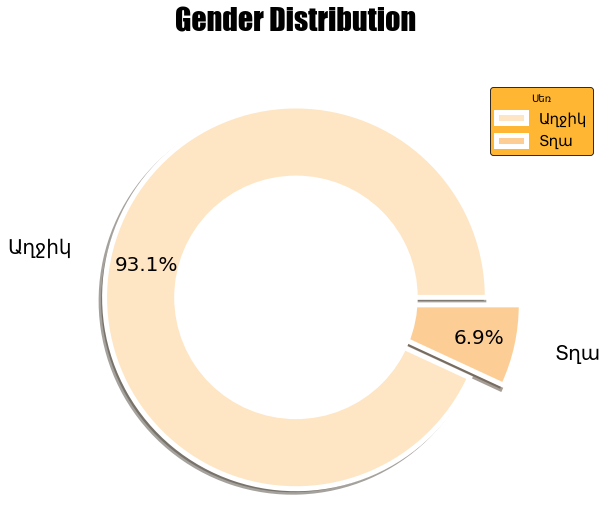

In [65]:
plt.rcParams["figure.figsize"] = (8,10)


colors = sns.color_palette('OrRd')[0:5]
counts = gender.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%', pctdistance=0.8, 
       textprops={'family':'sans-serif','color':'black','size':20},
       shadow=True,radius = 1.1, labeldistance=1.2,
       startangle=0, wedgeprops={'linewidth': 5, 'edgecolor': 'white'}, explode = (0, 0.2) )

# Add circle at the center of the pie chart
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Add title and legend

ax.set_title('Gender Distribution', fontdict={'family':'fantasy','color':'black','size':30}, y = 1.1)
ax.legend(loc='upper right', labels=counts.index, fontsize = 15, frameon=True, 
          edgecolor='black', facecolor='orange', title='Սեռ', bbox_to_anchor=(1.2, 1.0))
plt.show()

# Plot #2 Age Group

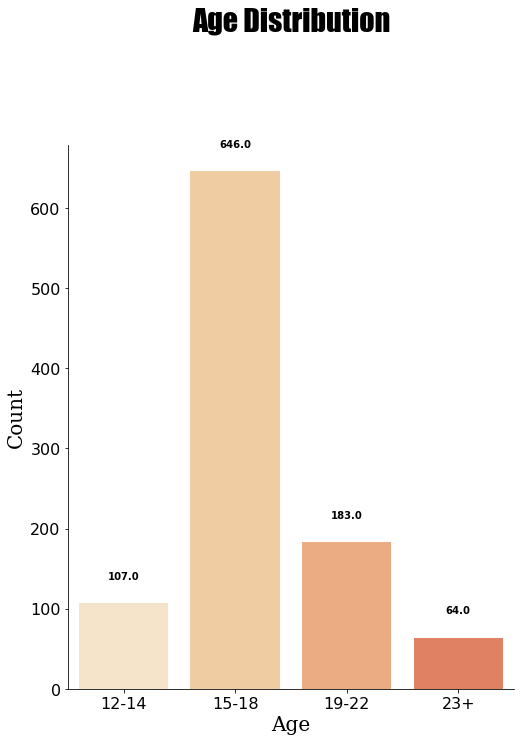

In [66]:
colors = sns.color_palette('OrRd')[0:5]
ax = sns.countplot(x=age, palette=colors, order = ["12-14", "15-18", "19-22", "23+"])
ax.tick_params(axis='both', which='major', labelsize=16)

# Customize labels and title
ax.set_xlabel('Age', fontdict={'family':'serif','color':'black','size':20})
ax.set_ylabel('Count', fontdict={'family':'serif','color':'black','size':20})

ax.set_title('Age Distribution', fontdict={'family':'fantasy','color':'black','size':30},  x=0.5, y=1.2)

# Add value labels to the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2., height+30, height, ha='center', fontweight='bold')

sns.despine()
plt.show()

# Plot #3 Placement

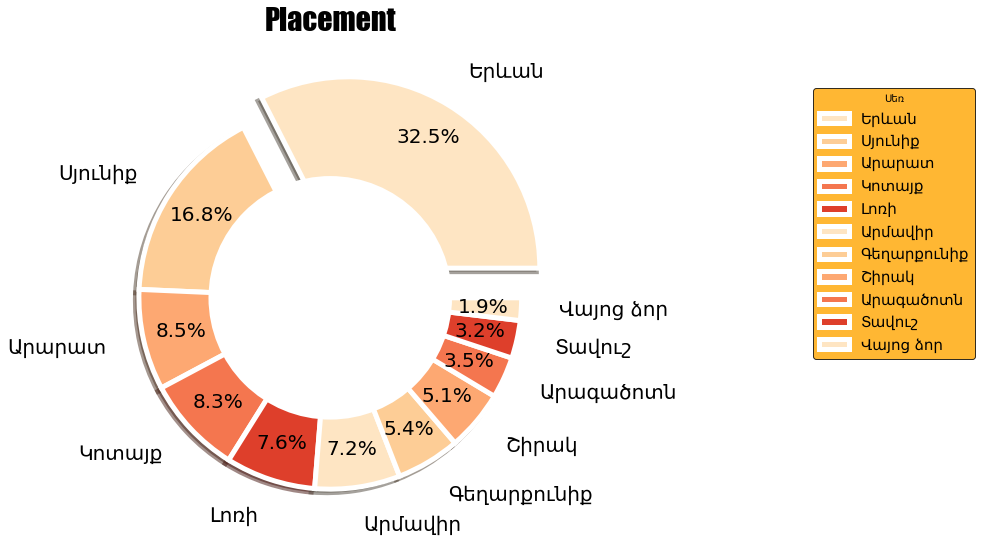

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8,10)


colors = sns.color_palette('OrRd')[0:5]
counts = placement.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%', pctdistance=0.8, 
       textprops={'family':'sans-serif','color':'black','size':20}, explode=(0.2,0,0,0,0,0,0,0,0,0,0),
       shadow=True,radius = 1.1, labeldistance=1.2,
       startangle=0, wedgeprops={'linewidth': 5, 'edgecolor': 'white'} )

# Add circle at the center of the pie chart
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Add title and legend

ax.set_title('Placement', fontdict={'family':'fantasy','color':'black','size':30}, y = 1.1)
ax.legend(loc='upper right', labels=counts.index, fontsize = 15, frameon=True, 
          edgecolor='black', facecolor='orange', title='Սեռ', bbox_to_anchor=(2, 1.0))
plt.show()

# Plot #4 Wordcount of famous Genres

### Translating Armenian categorical values to English

## If an error occurs during computation, its because of the browser or internet, just rerun the code

In [71]:
translator = Translator()
translated_categories = []
categories = genre.unique()
for word in categories:
    translation = translator.translate(word, dest='en')
    translated = translation.text.capitalize()
    print("Word: ", word,  "| Translation: ", translated)
    genre = genre.replace(word, translated)
    translated_categories.append(translated)

Word:  Adventure | Translation:  Adventure
Word:  Classic | Translation:  Classic
Word:  Comic | Translation:  Comic
Word:  Detective | Translation:  Detective
Word:  Drama | Translation:  Drama
Word:  Romance | Translation:  Romance
Word:  Biography | Translation:  Biography
Word:  Dialogue | Translation:  Dialogue
Word:  Fantastic | Translation:  Fantastic
Word:  Horror | Translation:  Horror
Word:  Thriller | Translation:  Thriller
Word:  Poems | Translation:  Poems
Word:  Adage | Translation:  Adage
Word:  Fairy tale | Translation:  Fairy tale
Word:  Legend | Translation:  Legend


### Plotting

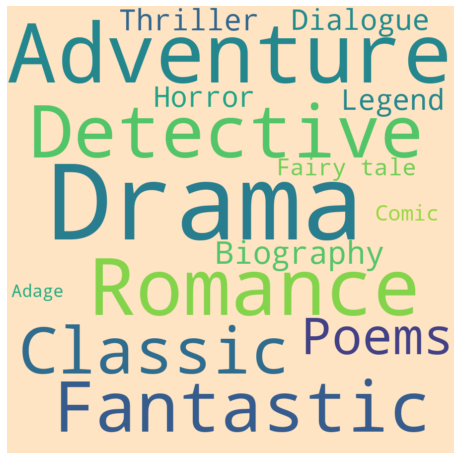

In [72]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your categorical data as a NumPy array
categories = translated_categories

# Convert to pandas Series and get value counts
genre_series = pd.Series(genre)
genre_counts = genre_series.value_counts()

# Convert to dictionary
genre_dict = dict(genre_counts)

# Create the wordcloud object
wordcloud = WordCloud(width=900, height=900, 
                      margin=0, background_color='bisque',).generate_from_frequencies(genre_dict)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


# Plot #5 Raw calculation of the most famous authors

In [74]:
authors = pd.Series(array)
top_10 = authors.value_counts()[:10]
top_10

պարույր սևակ         193
շիրվանզադե           186
վարդգես պետրոսյան    179
ջոն գրին             122
րաֆֆի                112
նար դոս              101
ալեքսանդր դյումա      96
վահան տերյան          96
ռեմարկ                91
ագաթա քրիստի          89
Name: count, dtype: int64

In [76]:
translator = Translator()
translated_categories = []
categories = genre.unique()
for word in top_10.index:
    translation = translator.translate(word, dest='en')
    translated = translation.text.capitalize()
    print("Word: ", word,  "| Translation: ", translated)
    genre = genre.replace(word, translated)
    translated_categories.append(translated)
top_10.index = translated_categories

Word:  պարույր սևակ | Translation:  Paruyr sevak
Word:  շիրվանզադե | Translation:  Shirvanzade
Word:  վարդգես պետրոսյան | Translation:  Vardges petrosyan
Word:  ջոն գրին | Translation:  John green
Word:  րաֆֆի | Translation:  Raffi
Word:  նար դոս | Translation:  Nar dos
Word:  ալեքսանդր դյումա | Translation:  Alexander dumas
Word:  վահան տերյան | Translation:  Vahan teryan
Word:  ռեմարկ | Translation:  Remark
Word:  ագաթա քրիստի | Translation:  Agatha christie


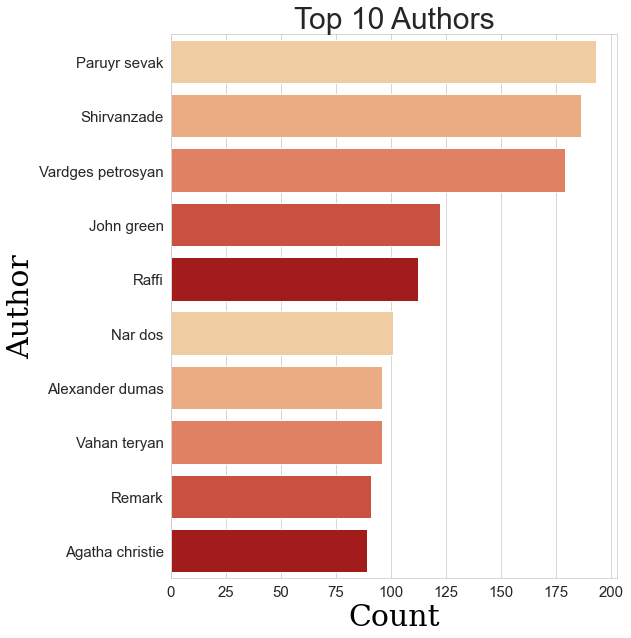

In [114]:
colors = sns.color_palette('OrRd')[1:15]
sns.set_style('whitegrid')
#sns.set_palette('OrRd')
sns.barplot(x=top_10.values, y=top_10.index, palette=colors)

plt.xlabel('Count', fontsize=30, fontdict={'family':'serif','color':'black','size':20})
plt.ylabel('Author', fontsize=30, fontdict={'family':'serif','color':'black','size':20})
plt.title('Top 10 Authors', fontsize=30)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

# SOME DRAFT CODES TO BE USED LATER

# Multiprocessing

In [1]:
# import multiprocessing
# from functools import partial


# def web_scraper_single(element):
#     converted = armenian_vs_english(element)[1]
#     results = web_scraper(converted)
#     if results[0] == 1:
#         return results[1]
#     results = web_scraper(element)
#     if results[0] == 1:
#         return results[1]
#     return results[2]
# def web_scraper_parallel(elements, num_processes):
#     pool = multiprocessing.Pool(num_processes)
#     results = pool.map(web_scraper_single, elements)
#     pool.close()
#     pool.join()
#     return results

# results = web_scraper_parallel(array, num_processes)
# missed = results.count("No Armenian Search Results")

### Jaccard distance does not work well enough

In [ ]:
# def jaccard_distance(s, t):
#     set_s = set(s)
#     set_t = set(t)
#     return len(set_s.intersection(set_t)) / len(set_s.union(set_t))

# # Example usage
# s1 = "պարույր սևակ".lower()
# s2 = "օսկար ուայլդ".lower()
# distance = jaccard_distance(s1, s2)
# print(distance) # Output: 0.5

# authors_data = data.loc[:, 'Հեղինակ 1' : 'Հեղինակ 10']

# arr = authors_data.values.flatten()


# authors_series = pd.Series(arr).value_counts()
# authors_series = authors_series.iloc[1:]
# authors_series = authors_series[authors_series > 2]
# authors_series

# author_names = pd.Series(authors_series.index)

# author_names

# frequent_names = author_names.apply(lambda name: jaccard_distance(name, "պարույր սևակ")).sort_values(ascending=False).head(10).index

# author_names.iloc[frequent_names]

### Levenshtein distance also

In [ ]:
# def calculate_distance(word_to_compare, real_word):
#     if (word_to_compare[-1] == "ե" or word_to_compare[-1] == 'է'):
#         word_to_compare = word_to_compare[:-1]
#     dist = lev.distance(word_to_compare, real_word,  weights=(1, 0, 1))
#     print("distance: ", dist)
#     if(lev.distance(word_to_compare, real_word,  weights=(1, 0, 1)) <= 6):
#         return (real_word)
#     return(word_to_compare)

# string_1 = "վահան տոտովենծ"
# string_2 = "վահան տերյան"
# print(calculate_distance(string_1, string_2))

## Other search methods

In [ ]:
# import wikipedia

In [ ]:
# wikipedia.page("Վահան Տերյան").title #Return only latin answers

# References

## 1. Word dictionary #1 (Maps Armenian letters to Latin ones)

https://github.com/YerevaNN/translit-rnn

## 2. English authors dataset

https://www.kaggle.com/datasets/choobani/goodread-authors

## 3. English words dataset

https://raw.githubusercontent.com/dwyl/english-words/master/words_dictionary.json